<a href="https://www.kaggle.com/code/hilalalpak/casestudy-flo-dataset?scriptVersionId=179653093" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00


In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
pd.set_option("display.width", 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv")

* master_id: Eşsiz müşteri numarası
* order_channel: Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)
* last_order_channel: En son alışverişin yapıldığı kanal
* first_order_date: Müşterinin yaptığı ilk alışveriş tarihi
* last_order_date: Müşterinin yaptığı son alışveriş tarihi
* last_order_date_online: Müşterinin online platformda yaptığı son alışveriş tarihi
* last_order_date_offline: Müşterinin offline platformda yaptığı son alışveriş tarihi
* order_num_total_ever_online: Müşterinin online platformda yaptığı toplam alışveriş sayısı
* order_num_total_ever_offline: Müşterinin offline'da yaptığı toplam alışveriş sayısı
* customer_value_total_ever_online: Müşterinin offline alışverişlerinde ödediği toplam ücret
* customer_value_total_ever_offline: Müşterinin online alışverişlerinde ödediği toplam ücret
* interested_in_categories_12: Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

In [3]:
df.head(10) 

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0000,2.0000,150.8700,49.9900,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0000,1.0000,59.9900,315.9400,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0000,1.0000,49.9900,113.6400,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0000,2.0000,120.4800,934.2100,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0000,1.0000,69.9800,95.9800,"[KADIN, AKTIFSPOR]"


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0000,3.1109,4.2256,1.0000,1.0000,2.0000,4.0000,200.0000
order_num_total_ever_offline,19945.0000,1.9139,2.0629,1.0000,1.0000,1.0000,2.0000,109.0000
customer_value_total_ever_offline,19945.0000,253.9226,301.5329,10.0000,99.9900,179.9800,319.9700,18119.1400
customer_value_total_ever_online,19945.0000,497.3217,832.6019,12.9900,149.9800,286.4600,578.4400,45220.1300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [6]:
df["master_id"].nunique() #total customer

19945

In [7]:
df.isnull().sum() #missing value

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [8]:
df["TotalOrder"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["TotalOrder"].head()

0    5.0000
1   21.0000
2    5.0000
3    2.0000
4    2.0000
Name: TotalOrder, dtype: float64

In [9]:
df["TotalPrice"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]
df["TotalPrice"].head()

0    939.3700
1   2013.5500
2    585.3200
3    121.9700
4    209.9800
Name: TotalPrice, dtype: float64

In [10]:
##The type information of time variables is entered as object.Convert this to datetime.

date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))

import warnings
warnings.filterwarnings("ignore", message="Parsing dates in %Y-%m-%d format when dayfirst=True was specified")

/tmp/ipykernel_18/2364502228.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))
/tmp/ipykernel_18/2364502228.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))
/tmp/ipykernel_18/2364502228.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))
/tmp/ipykernel_18/2364502228.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[dat

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [12]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,TotalOrder,TotalPrice
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN],5.0000,939.3700
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0000,2013.5500
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]",5.0000,585.3200
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]",2.0000,121.9700
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR],2.0000,209.9800


<Axes: xlabel='order_channel', ylabel='count'>

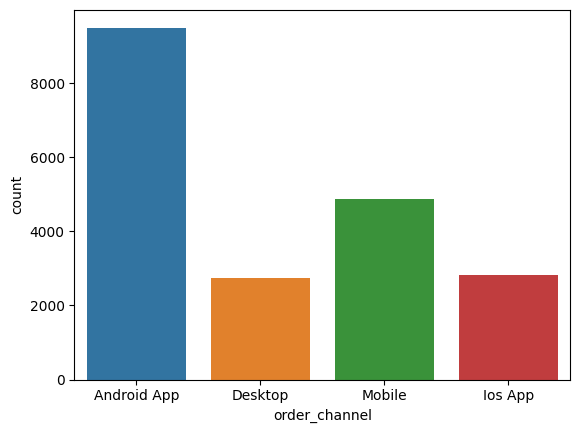

<Axes: xlabel='TotalPrice'>

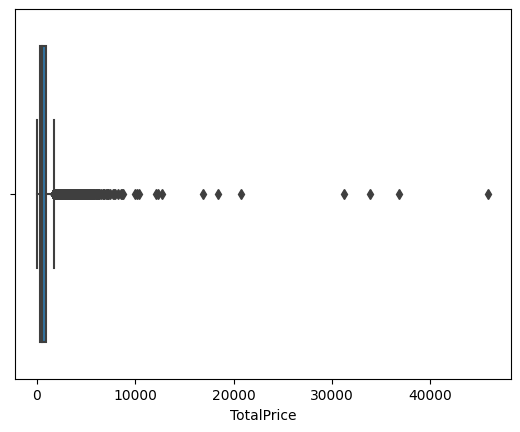

In [13]:
##Overview of values with graphs
import seaborn as sns

sns.countplot(x=df["order_channel"], data=df)
plt.show()

sns.boxplot(x=df["TotalPrice"])
plt.show()

In [14]:
df.groupby("order_channel").agg({"TotalOrder": ["count", "sum"],
                                 "TotalPrice": ["sum", "mean"]})

TotalOrder              TotalPrice         
                   count        sum          sum     mean
order_channel                                            
Android App         9495 52269.0000 7819062.7600 823.4927
Desktop             2735 10920.0000 1610321.4600 588.7830
Ios App             2833 15351.0000 2525999.9300 891.6343
Mobile              4882 21679.0000 3028183.1600 620.2751

In [15]:
df["TotalPrice"].sort_values(ascending=False).head(10)
df["TotalOrder"].sort_values(ascending=False).head(10)

11150   45905.1000
4315    36818.2900
7613    33918.1000
13880   31227.4100
9055    20706.3400
7330    18443.5700
8068    16918.5700
163     12726.1000
7223    12282.2400
18767   12103.1500
Name: TotalPrice, dtype: float64

11150   202.0000
7223    131.0000
8783    111.0000
2619     88.0000
6322     83.0000
7613     82.0000
9347     77.0000
10954    75.0000
8068     70.0000
7330     70.0000
Name: TotalOrder, dtype: float64

> ##Functionalization

def data_prep(dataframe, csv=False):
        dataframe["TotalOrder"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"] 
        dataframe["TotalPrice"] = dataframe["customer_value_total_ever_online"] + dataframe["customer_value_total_ever_offline"]
        
        dateframe_columns = dataframe.columns[dataframe.columns.str.contains("date")]
        dataframe[date_columns] = dataframe[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))

In [16]:
##Calculate RFM Metrics

df["last_order_date"].max()
today_date = dt.datetime(year=2021, month=6, day=1)

Timestamp('2021-05-30 00:00:00')

In [17]:
rfm = df.groupby("master_id").agg({"last_order_date": lambda x: (today_date - x.max()).days,
                                      "TotalOrder": lambda x: x,
                                     "TotalPrice": lambda x: x})
rfm.columns = ["recency", "frequency", "monetary"]

In [18]:
##Create RFM Scores

rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])

rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) +
                    rfm["frequency_score"].astype(str))

In [19]:
##Segmenting with the seg_map

seg_map = {r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'}

rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg({"mean", "count"})

recency          frequency         monetary          
                      count     mean     count    mean    count      mean
segment                                                                  
About_to_Sleep         1643 114.0316      1643  2.4066     1643  361.6494
At_Risk                3152 242.3290      3152  4.4702     3152  648.3250
Cant_Loose             1194 235.1591      1194 10.7169     1194 1481.6524
Champions              1920  17.1422      1920  8.9651     1920 1410.7089
Hibernating            3589 247.4263      3589  2.3915     3589  362.5833
Loyal_Customers        3375  82.5579      3375  8.3564     3375 1216.2572
Need_Attention          806 113.0372       806  3.7395      806  553.4366
New_Customers           673  17.9762       673  2.0000      673  344.0495
Potential_Loyalists    2925  36.8697      2925  3.3108     2925  533.7413
Promising               668  58.6946       668  2.0000      668  334.1533

In [20]:
rfm.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700,5,4,4,54,Champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700,1,1,2,12,Hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900,2,4,3,23,At_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600,5,4,4,54,Champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300,5,5,4,54,Champions


In [21]:
df2 = df[["master_id", "interested_in_categories_12"]]

rfm = pd.merge(rfm, df2, on="master_id")
rfm.head()

,master_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RF_SCORE,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700,5,4,4,54,Champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700,1,1,2,12,Hibernating,"[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900,2,4,3,23,At_Risk,"[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600,5,4,4,54,Champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300,5,5,4,54,Champions,"[ERKEK, AKTIFSPOR]"


In [22]:
##Case1

df_cust = rfm.loc[(rfm["interested_in_categories_12"].str.contains("KADIN")) &
                      ((rfm["segment"] == "Loyal_Customers") | (rfm["segment"] == "Champions"))]
df_cust["master_id"].head()
df_cust.to_csv("customers.csv") #Convert to csv file to share with the necessary department

3     000c1fe2-a8b7-11ea-8479-000d3a38a36f
18    003903e0-abce-11e9-a2fc-000d3a38a36f
22    004bec18-9f7a-11e9-a2fc-000d3a38a36f
25    00534fe4-a6b4-11e9-a2fc-000d3a38a36f
49    009293fe-1f3e-11ea-87bf-000d3a38a36f
Name: master_id, dtype: object

In [23]:
##Case2

target = rfm.loc[(rfm["interested_in_categories_12"].str.contains("ERKEK")) |
                  (rfm["interested_in_categories_12"].str.contains("ÇOCUK")) & 
                ((rfm["segment"] == "Cant_Loose") | (rfm["segment"] == "Hibernating") | (rfm["segment"] == "New_Customers"))]

target.head()
target.to_csv("targets.csv") #Convert to csv file to share with the necessary department

,master_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RF_SCORE,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700,5,4,4,54,Champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700,1,1,2,12,Hibernating,"[ERKEK, KADIN]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600,5,4,4,54,Champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300,5,5,4,54,Champions,"[ERKEK, AKTIFSPOR]"
11,00263f1a-210a-11ea-b50a-000d3a38a36f,362,3.0000,501.9400,1,3,2,12,Hibernating,[ERKEK]
